# Exercise 2 - Binary Classification with Logistic Regression

This exercise is meant to familiarize you with the complete pipeline of solving a machine learning problem. You
need to obtain and pre-process the data, develop, implement and train a machine learning model and evaluate it
by splitting the data into a training and validation set. Note that *implement* does **not** mean *import*.

### Submission

- Deadline of submission:
        x.y.z
- Mail your solution notebook or a link to your gitlab repository (with the solution notebook inside) to:
        paul.kahlmeyer@uni-jena.de

In the (more likely) event of a persistent problem, do not hesitate to contact the course instructors.

## Data Preparation

In the model of *logistic regression*, we have features $x_i\in\mathbb{R}^n$ with labels $y_i\in\{0,1\}$.
We use the example dataset `data.npy`, where we have 2 dimensional features (first two columns) and a binary label (3rd column).

### Task 1
Load and split the dataset into `X` and `Y`. Then plot the data with a scatterplot and use different colors for different labels.

Text(0, 0.5, 'X1')

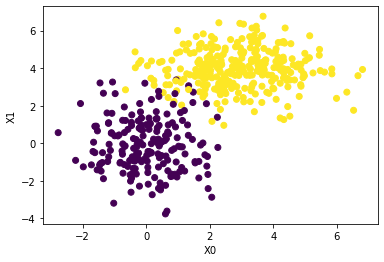

In [1]:
# TODO: Load and split dataset

import numpy as np
# load data
data = np.load('data.npy')
X = data[:,0:2]
Y = data[:,-1]

# TODO: plot data
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel("X0")
plt.ylabel("X1")

The goal in logistic regression is to find the parameter vector $\theta\in\mathbb{R}^n$, so that 

\begin{align}
p(y_i=1|\theta)&=\sigma(x_i^T\theta)\\
p(y_i=0|\theta)&=1-p(y_i=1|\theta)
\end{align}

fits our data and can be used to predict the label on unseen data (binary classification).

The function $\sigma$ is called the *logistic sigmoid function*
\begin{align}
\sigma(a) = \cfrac{1}{1+\exp(-a)}
\end{align}

With an estimated $\theta$, a new feature $x\in\mathbb{R}^n$ is classified according to $\sigma(x_i^T\theta)$.

### Task 2
Prepare `X` so that the classification function for an estimated $\theta$ is *affine*. Add this affine component at the **first column**.

Hint: Remember the design matrix from linear regression- how did we achieve an affine regression?

In [2]:
# TODO: Prepare X
intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
X[:3]

array([[ 1.        ,  4.8777683 ,  3.89871851],
       [ 1.        , -1.1680935 , -0.05555429],
       [ 1.        , -0.68944918,  1.92973945]])

### Task 3

Implement a logistic classifier based on the above definition of probabilities.
The classifier should take $m$ input features $X\in\mathbb{R}^{m\times n}$ and a vector $\theta$ as input and output predictions $\hat{Y}\in\{0,1\}^m$.

In [3]:
def sigmoid(X, theta):
    # TODO: implement sigmoid function
    a = X @ theta
    return 1 / (1 + np.exp(-a))

def predict(X,theta):
    # TODO: calculate and return predictions
    prob = sigmoid(X,theta)
    return np.around(prob)

## Learning $\theta$

For a given $\theta$, we can calculate $p(y_i|\theta)$ and use this probability for classification.
To evaluate how well a learned $\theta$ can be used to classify our data, we define a *loss function*.
Here we want to use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) given as:
\begin{align}
L(\theta) = -\cfrac{1}{m}\sum_{i=1}^m y_i\log(p(y_i=1|\theta))+(1-y_i)\log(1-p(y_i=1|\theta))
\end{align}
Often it is convenient to have multiple metrics at hand. In classification problems, the *accuracy* of a
prediction is defined as the percentage of correctly classified features. In the case of logistic regression, this corresponds to 
\begin{align}
Acc(\theta) = \cfrac{1}{m}\sum_{i=1}^m y_i\mathbf{1}(p(y_i=1|\theta)>0.5) + (1-y_i)\mathbf{1}(p(y_i=0|\theta)\geq 0.5)
\end{align}
where $\mathbf{1}$ is the indicator function (takes value 1, if argument is true).

As our model becomes better, we expect the accuracy to increase and the loss to decrease.  

### Task 3
Implement the binary cross entropy and the accuracy for logistic regression. 
The loss takes the features $X$, the true labels $Y$ and the parameter vector $\theta$ as input, whereas the accuracy only needs $Y$ and the predicted labels $\hat{Y}$. 

In [4]:
def loss(X,Y,theta):
    # TODO: implement binary cross entropy
    probs = sigmoid(X,theta)
    return -np.mean(Y*np.log(probs) + (1-Y)*np.log(1-probs))

def acc(Y,Y_hat):
    # TODO: implement accuracy
    return np.sum(Y==Y_hat)/Y.shape[0]

Given the loss function $L(\theta)$, we want to minimize this function with respect to the parameters $\theta$, that is we are looking for

\begin{align}
    \text{argmin}_\theta L(\theta)
\end{align}

However, since there is no closed form solution to this optimization problem we use an iterative approach that starts with an initial estimate for $\theta$ and approaches the solution at each iteration step. 
The most simple approach is to take the gradient
$\nabla L(\theta)$ of $L(\theta)$ with respect to $\theta$ and walk into direction of the negative gradient. 
This method is called gradient-descent.

### Task 4

Calculate $\nabla L(\theta) = \cfrac{\partial L}{\partial \theta}$ and implement this function.
The resulting function takes features $X$, labels $Y$ and the probabilities $p(Y=1|\theta)$ as input and outputs a gradient $\nabla L(\theta)\in\mathbb{R}^n$.

Hint: Set $h_i:=x_i^T\theta$ and $z_i:=\sigma(h)$ and use the chain rule $\cfrac{\partial L}{\partial \theta} = -\cfrac{1}{m}\sum_{i=1}^m\cfrac{\partial L(\theta|x_i,y_i)}{\partial z_i}\cfrac{\partial z_i}{\partial h_i}\cfrac{\partial h_i}{\partial \theta_i}$

In [5]:
def gradient(X,Y,probs):
    # TODO: Implement gradient
    return (X.T @ (probs- Y))/Y.shape[0]

Solution:
\begin{align}
\cfrac{\partial L(\theta|x_i,y_i)}{\partial z_i} &= \cfrac{y_i-z_i}{z_i(1-z_i)}\\
\cfrac{\partial z_i}{\partial h_i} &= z_i(1-z_i)\\
\cfrac{\partial h_i}{\partial \theta_i} &= x_i
\end{align}
and therefore
\begin{align}
\cfrac{\partial L}{\partial \theta} &= -\cfrac{1}{m}\sum_{i=1}^m x_i (y_i-\sigma(x_i^T\theta))\\
&=\cfrac{1}{m}\sum_{i=1}^m x_i (\sigma(x_i^T\theta)-y_i)
\end{align}

### Task 5
With the gradient function, implement the *gradient descend* algorithm:

 1. choose initial $\theta$
 2. update $\theta \leftarrow \theta -\eta\nabla L(\theta)$
 
The update step is called in a loop until a maximum number of iterations $\lambda$ is reached or the loss did not change more than $\varepsilon$. 

The function should take the features $X$, the labels $Y$ and values for $\eta,\lambda$ and $\varepsilon$ as input and output $\theta$.

In [6]:
def gradient_descend(X, Y, eta=1e-2, lam=100, eps=1e-4):
    # TODO: Implement gradient descend algorithm
    theta = np.zeros(X.shape[1])
    current_loss = loss(X,Y,theta)
    for it in range(lam):
        probs = sigmoid(X, theta)
        grad = gradient(X,Y,probs)
        
        # update
        theta = theta - eta*grad
        
        # determine accuracy
        Y_hat = predict(X,theta)
        accuracy = acc(Y, Y_hat)
        
        # determine loss
        old_loss = current_loss
        current_loss = loss(X,Y,theta)
        
        if abs(current_loss-old_loss)<eps:
            break    
    return theta

theta = gradient_descend(X,Y)

In the last exercise we learned, that we need to split our data into test and trainset in order to evaluate the performance. 

### Task 6
Split the dataset into train- and testdata. Extend your implementation of `gradient_descend` to a new function `fit`.
This function should perform gradient descend and additionaly evaluate the loss and accuracy for train and testdata in each iteration. The accuracies and losses should be returned as well as $\theta$. Add the option to print these statistics in each iteration (parameter `verbose`).

In [7]:
# TODO: Split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [8]:
def fit(X_train, X_test, Y_train, Y_test, eta=1e-1, lam=10, eps=1e-4, verbose=0):
    # TODO: Implement gradient descend algorithm with status message
    theta = np.zeros(X_train.shape[1])
    
    Y_hat_train = predict(X_train,theta)
    accuracy_train = acc(Y_train, Y_hat_train)
    Y_hat_test = predict(X_test,theta)
    accuracy_test = acc(Y_test, Y_hat_test)
    
    current_loss_train = loss(X_train,Y_train,theta)
    loss_test = loss(X_test, Y_test, theta)
    
    losses = {'train': [current_loss_train], 'test': [loss_test]}
    accs = {'train': [accuracy_train], 'test': [accuracy_test]}
    
    for it in range(lam):
        probs = sigmoid(X_train, theta)
        grad = gradient(X_train,Y_train,probs)
        
        # update
        theta = theta - eta*grad
        
        # determine accuracies
        Y_hat_train = predict(X_train,theta)
        accuracy_train = acc(Y_train, Y_hat_train)
        Y_hat_test = predict(X_test,theta)
        accuracy_test = acc(Y_test, Y_hat_test)
        
        # determine losses
        old_loss_train = current_loss_train
        current_loss_train = loss(X_train,Y_train, theta)
        loss_test = loss(X_test, Y_test, theta)
        
        # collect values
        losses['train'].append(current_loss_train)
        losses['test'].append(loss_test)
        accs['train'].append(accuracy_train)
        accs['test'].append(accuracy_test)
        
        # print status
        if verbose:
            print(f"Iteration: {it} Train Loss: {round(current_loss_train,2)} Test Loss: {round(loss_test,2)} Train Acc: {round(accuracy_train,2)} Test Acc: {round(accuracy_test,2)}")
        
        # abortion?
        if abs(current_loss_train-old_loss_train)<eps:
            break    
    return theta, losses, accs

### Task 7
Estimate the parameters of $\theta$ using your implementation. Plot the accuracies and losses using matplotlib.

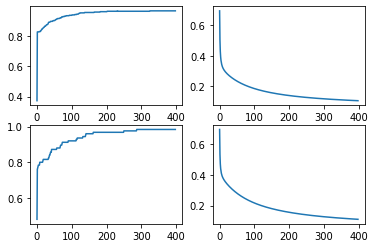

In [9]:
# TODO: Estimate theta, plot accuracies and losses
theta, losses, accs = fit(X_train, X_test, Y_train, Y_test, eta=1e-1, lam=1000, eps=1e-4, verbose = False)

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0,0].plot(accs['train'])
axs[0,1].plot(losses['train'])
axs[1,0].plot(accs['test'])
axs[1,1].plot(losses['test'])

## Visualization

Next we want to visualize our classifier. To to this, we can simply plot a heatmap of $p(y_i=1|x)$.

The *decision boundary* or *regression line* is defined as 
\begin{align}
\{x\in\mathbb{R}^n: p(y=1|x)=0.5\}
\end{align}

The following function can be used to plot $p(Y=1|X)$ as well as the regression line in our 2D example ($n=2$):

In [10]:
def plot_regression_line(X,Y, theta):    
    # make these smaller to increase the resolution
    dx, dy = 0.05, 0.05
    levels = np.arange(0,1.1,1e-2)

    # generate grids + probs
    x1, x2 = np.mgrid[slice(np.min(X[:,1]), np.max(X[:,1]) + dy, dy), slice(np.min(X[:,2]), np.max(X[:,2]) + dx, dx)]
    points = np.stack([np.ones(np.prod(x1.shape)), x1.flatten(),x2.flatten()]).T
    probs = sigmoid(points,theta).reshape(x1.shape)

    # plot points + heatmap
    cmap = plt.get_cmap('bwr')
    plt.contourf(x1, x2, probs, cmap=cmap, levels=levels, alpha=0.5)
    plt.colorbar()
    plt.contour(x1, x2, probs, levels=[0.5], colors='black', linewidths=4)

### Task 8
Use the `plot_regression_line` function to plot the regression line over the data. 

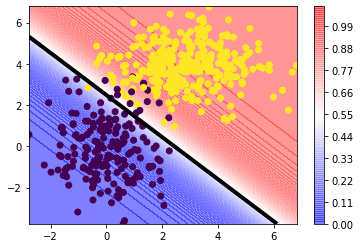

In [11]:
# TODO: plot regression line with data
plot_regression_line(X,Y, theta)
plt.scatter(X[:,1],X[:,2], c=Y)

### Task 9
Compare your result with the result from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

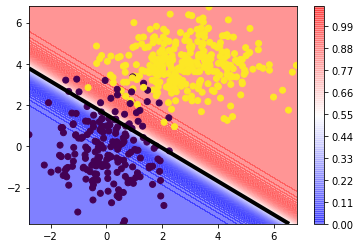

In [12]:
# TODO: estimate theta with scikit-learn
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty='none')
logisticRegr.fit(X_train, Y_train)
theta_sklearn = logisticRegr.coef_[0]

# TODO: plot regression line with data
plot_regression_line(X,Y, theta_sklearn)
plt.scatter(X[:,1],X[:,2], c=Y)

## Spam Filter

We want to use logistic regression to perform Spam Filtering on the [*UCI SMS Spam Collection*](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) dataset. The goal is to classify a SMS from its text into the categories "spam" or "ham".

### Task 10

The dataset is saved as a text file at `SMSSpamCollection.txt`. Find a way to load the dataset and transform the features `X` (SMS) and the labels `Y` (spam/ham) into numerical representations.

Hint:

For transforming SMS into features, check out [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html)

In [13]:
# TODO: load and preprocess dataset

# read txt
with open('SMSSpamCollection.txt') as inf:
    lines = inf.readlines()
    
# transform to dataframe
data = {'feature': [], 'label': []}
for line in lines:
    label, feature = line.split('\t')
    data['feature'].append(feature)
    data['label'].append(label)
import pandas as pd
df = pd.DataFrame(data = data)

# labels->0,1
df['label'] = df['label'].map({'ham':0, 'spam':1})
Y = np.array(df['label'])

# features into bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['feature']).toarray()

X.shape, Y.shape

((5574, 8752), (5574,))

### Task 11

Use your implementation of logistic regression to learn $\theta$ for this dataset. Try to get your accuracy as high as possible.

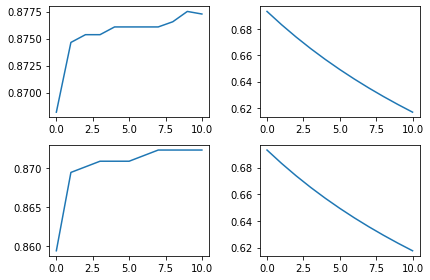

In [14]:
# TODO: use own logistic regression on dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
theta, losses, accs = fit(X_train, X_test, Y_train, Y_test, eta=1e-1, lam=10, eps=1e-4, verbose = False)
fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0,0].plot(accs['train'])
axs[0,1].plot(losses['train'])
axs[1,0].plot(accs['test'])
axs[1,1].plot(losses['test'])
plt.tight_layout()